Weaving a transformable curved surface from catenoid to helicoid.

<div class="videoWrapper">
  <!-- Copy & Pasted from YouTube -->
  <iframe width="560" height="315" src="https://www.youtube.com/embed/Gp6XkPLCw7s" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
</div>

## Load packages

In [1]:
using IntervalSets
using BasicBSpline
using StaticArrays
using ElasticSurfaceEmbedding

## Define the shape of the surface (non-periodic direction)

In [2]:
ElasticSurfaceEmbedding.𝒑₍₀₎(u¹,u²) = SVector(cos(u²)*cosh(u¹),sin(u²)*cosh(u¹),u¹)
n = 9
Da(n) = (-π/2..π/2,-π/(4n)..π/(4n))

Da (generic function with 1 method)

## Compute the shape of the embeddings

┌ Info: Strain - domain: [-1.5707963267948966, 1.5707963267948966]×[-0.08726646259971647, 0.08726646259971647]
└ Predicted: (min: -0.0025384784982225715, max: 0.0012692392491112856)


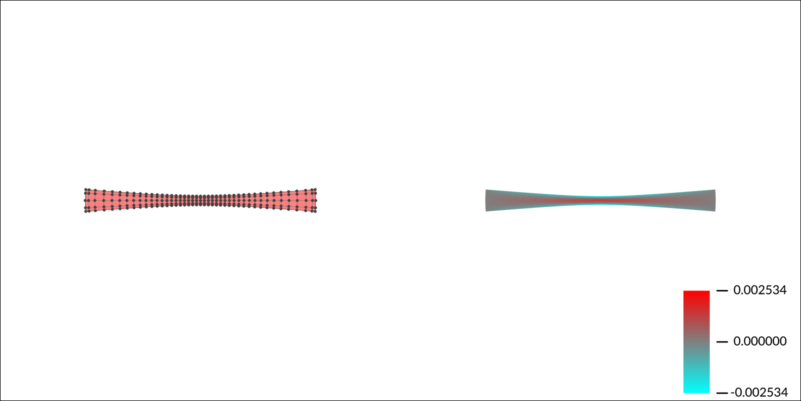

In [3]:
show_strain(Da(n))

steptree = initial_state(Da(n))
newton_onestep!(steptree, fixingmethod=:fix3points)
newton_onestep!(steptree)
newton_onestep!(steptree)
newton_onestep!(steptree)
newton_onestep!(steptree)
refinement!(steptree, p₊=(0,1), k₊=suggest_knotvector(steptree))
newton_onestep!(steptree)
newton_onestep!(steptree)
pin!(steptree)

## Export the shape in SVG format

In [4]:
export_pinned_steps("helicatenoid-a", steptree, unitlength=(40,"mm"), mesh=(18,1))

1-element Vector{String}:
 "helicatenoid-a/pinned/pinned-9.svg"

![](helicatenoid-a/pinned/pinned-9.svg)

## Define the shape of the surface (periodic direction)

In [5]:
ElasticSurfaceEmbedding.𝒑₍₀₎(u¹,u²) = SVector(cos(u¹)*cosh(u²),sin(u¹)*cosh(u²),u²)
Db(i,n) = (-π..π,(i-1)*π/(2n)..(i)*π/(2n))

# Check the maximum strain
for i in 1:n
    show_strain(Db(i,n))
end

# Numerical computing
steptree = StepTree()
for i in 1:n
    initial_state!(steptree, Db(i,n))
    newton_onestep!(steptree, fixingmethod=:fix3points)
    newton_onestep!(steptree)
    newton_onestep!(steptree)
    newton_onestep!(steptree)
    newton_onestep!(steptree)
    refinement!(steptree, p₊=(0,1), k₊=suggest_knotvector(steptree))
    newton_onestep!(steptree)
    newton_onestep!(steptree)
    pin!(steptree)
end

┌ Info: Strain - domain: [-3.141592653589793, 3.141592653589793]×[0.0, 0.17453292519943295]
└ Predicted: (min: -0.0025192446028988627, max: 0.0012596223014494311)
┌ Info: Strain - domain: [-3.141592653589793, 3.141592653589793]×[0.17453292519943295, 0.3490658503988659]
└ Predicted: (min: -0.0023721456374501803, max: 0.0011860728187250893)
┌ Info: Strain - domain: [-3.141592653589793, 3.141592653589793]×[0.3490658503988659, 0.5235987755982988]
└ Predicted: (min: -0.0021105110486750235, max: 0.0010552555243375109)
┌ Info: Strain - domain: [-3.141592653589793, 3.141592653589793]×[0.5235987755982988, 0.6981317007977318]
└ Predicted: (min: -0.0017852175622718365, max: 0.0008926087811359181)
┌ Info: Strain - domain: [-3.141592653589793, 3.141592653589793]×[0.6981317007977318, 0.8726646259971648]
└ Predicted: (min: -0.0014467651124962513, max: 0.0007233825562481255)
┌ Info: Strain - domain: [-3.141592653589793, 3.141592653589793]×[0.8726646259971648, 1.0471975511965976]
└ Predicted: (min: -0.

## Export the shapes in SVG format

In [6]:
export_pinned_steps("helicatenoid-b", steptree, unitlength=(40,"mm"), mesh=(36,1))

9-element Vector{String}:
 "helicatenoid-b/pinned/pinned-9.svg"
 "helicatenoid-b/pinned/pinned-18.svg"
 "helicatenoid-b/pinned/pinned-27.svg"
 "helicatenoid-b/pinned/pinned-36.svg"
 "helicatenoid-b/pinned/pinned-45.svg"
 "helicatenoid-b/pinned/pinned-54.svg"
 "helicatenoid-b/pinned/pinned-63.svg"
 "helicatenoid-b/pinned/pinned-72.svg"
 "helicatenoid-b/pinned/pinned-81.svg"

![](helicatenoid-b/pinned/pinned-9.svg) ![](helicatenoid-b/pinned/pinned-18.svg) ![](helicatenoid-b/pinned/pinned-27.svg)
![](helicatenoid-b/pinned/pinned-36.svg) ![](helicatenoid-b/pinned/pinned-45.svg) ![](helicatenoid-b/pinned/pinned-54.svg)
![](helicatenoid-b/pinned/pinned-63.svg) ![](helicatenoid-b/pinned/pinned-72.svg) ![](helicatenoid-b/pinned/pinned-81.svg)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*